# Convolutional Neural Network

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


A Dataset of Sea creatures with 4 classes and a minimum of 400 images for each class

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten
import tensorflow as tf

#### DATA PREPROCESSING

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the image size
IMAGE_SIZE = 128
augmenter = ImageDataGenerator(
        rescale=1./255,
    rotation_range=20,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,

)

In [4]:
# augmenting data
augmentedTrainSet = augmenter.flow_from_directory(
        '/content/drive/MyDrive/Dataset/Train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse",
        shuffle=True,
        batch_size=9
)

print(len(augmentedTrainSet))

Found 1878 images belonging to 4 classes.
209


Train set have 1878 images and it belongs to 4 classes

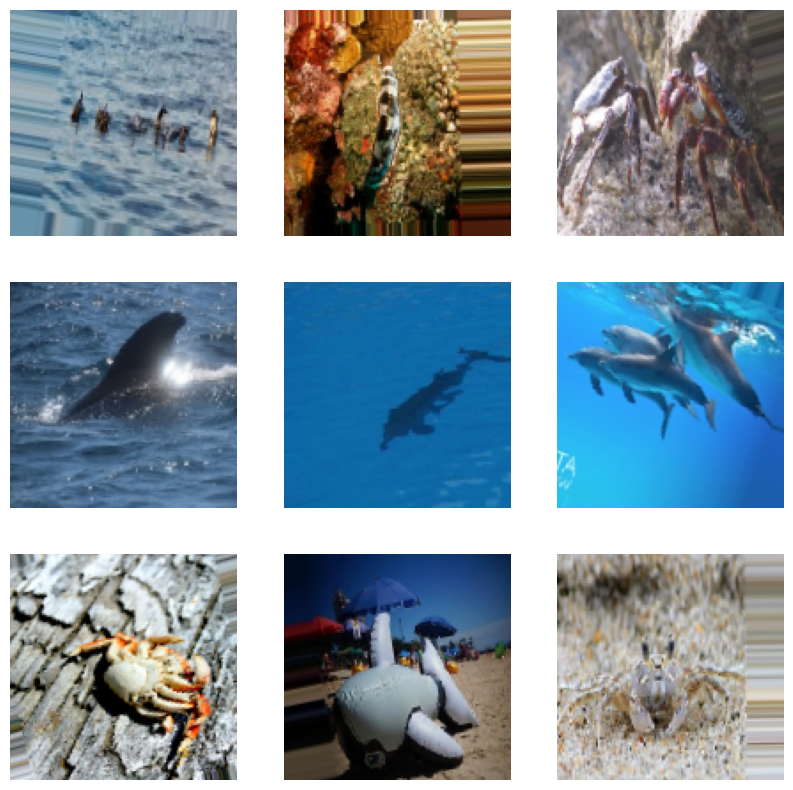

In [5]:
# Plottting the some of the augmented dataset
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(9):
    images, _ = next(augmentedTrainSet)
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[0])
    plt.axis('off')
plt.show()

In [6]:
#Print the class names
classes = list(augmentedTrainSet.class_indices.keys())
classes

['Clams', 'Corals', 'Crabs', 'Dolphin']

In [7]:
testAugmenter = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

#augmented data
augmentedTestSet = testAugmenter.flow_from_directory(
        '/content/drive/MyDrive/Dataset/Test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse"
)

Found 400 images belonging to 4 classes.


###  CNN MODEL

In [19]:
cnn = tf.keras.models.Sequential()

#### Convolution

In [20]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[128, 128, 3]))

#### Pooling

In [21]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#### Adding a second convolutional layer

In [22]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#### Adding a third convolutional layer

In [23]:
cnn.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=1))

#### Flattening

In [24]:
cnn.add(tf.keras.layers.Flatten())

#### Full Connection

In [25]:
cnn.add(Dense(units=96, activation='relu'))
cnn.add(Dropout(0.40))
cnn.add(Dense(units=32, activation='relu'))


#### Output Layer

In [26]:
cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))

#### Compiling the CNN

In [27]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
#Training the CNN
history = cnn.fit(augmentedTrainSet, validation_data=augmentedTestSet, epochs=20)

Epoch 1/20
209/209 [==============================] - 94s 440ms/step - loss: 1.0280 - accuracy: 0.5501 - val_loss: 0.8696 - val_accuracy: 0.6125
Epoch 2/20
209/209 [==============================] - 85s 408ms/step - loss: 0.8847 - accuracy: 0.6384 - val_loss: 0.8825 - val_accuracy: 0.6250
Epoch 3/20
209/209 [==============================] - 88s 422ms/step - loss: 0.8465 - accuracy: 0.6613 - val_loss: 0.8048 - val_accuracy: 0.7250
Epoch 4/20
209/209 [==============================] - 94s 447ms/step - loss: 0.8251 - accuracy: 0.6635 - val_loss: 0.8775 - val_accuracy: 0.6600
Epoch 5/20
209/209 [==============================] - 78s 375ms/step - loss: 0.7715 - accuracy: 0.6933 - val_loss: 0.6999 - val_accuracy: 0.7500
Epoch 6/20
209/209 [==============================] - 84s 402ms/step - loss: 0.7479 - accuracy: 0.7098 - val_loss: 0.6115 - val_accuracy: 0.7650
Epoch 7/20
209/209 [==============================] - 83s 395ms/step - loss: 0.7206 - accuracy: 0.7093 - val_loss: 0.6860 - val_ac

### Visualizing training/validation loss and accuracy.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


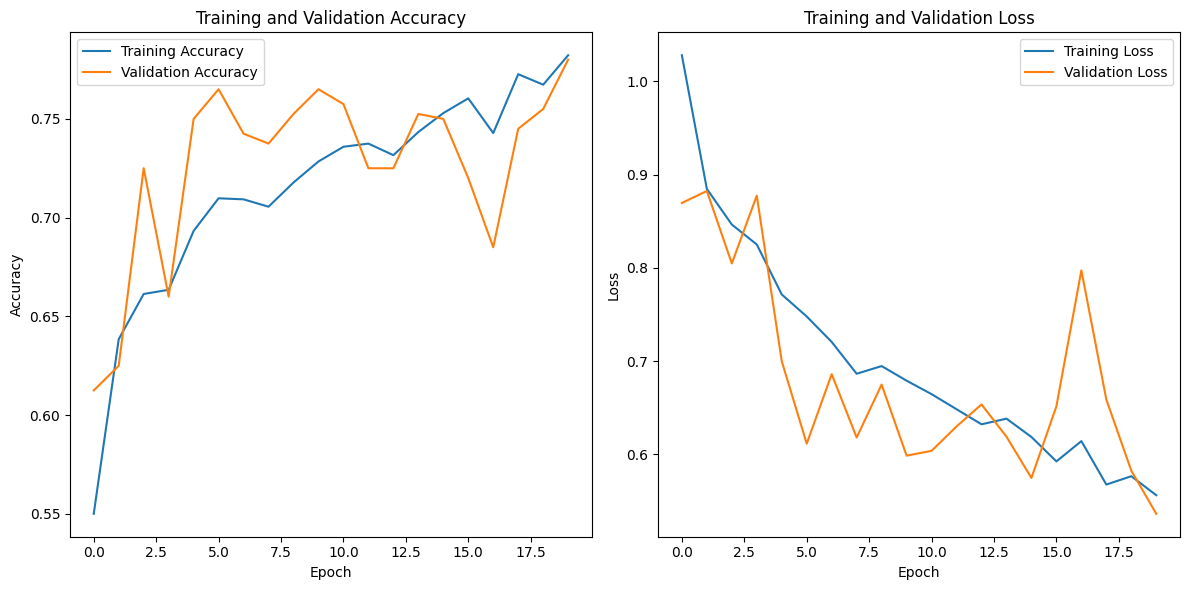

In [30]:
plt.figure(figsize=(12, 6))

# training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### EVALUATION

#### Evaluate the performance of your trained model on the test dataset

In [31]:
# Evaluate the model on the test dataset
evaluation = cnn.evaluate(augmentedTestSet)

# Print the evaluation results
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

13/13 [==============================] - 6s 441ms/step - loss: 0.5274 - accuracy: 0.7825
Test Loss: 0.5273718237876892
Test Accuracy: 0.7825000286102295


13/13 [==============================] - 9s 662ms/step
Precision: 0.31906024362920915
Recall: 0.315
F1 Score: 0.31458351792069117


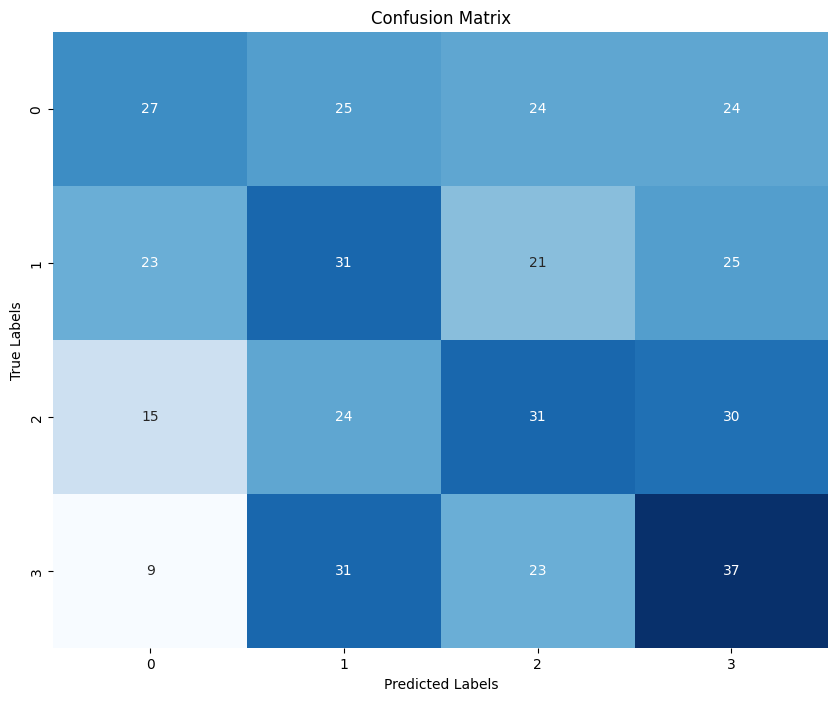

In [34]:

# Calculate additional evaluation metrics

# Predict classes for test data
test_predictions = np.argmax(cnn.predict(augmentedTestSet), axis=-1)
true_classes = augmentedTestSet.classes

# Evaluation metrics
precision = precision_score(true_classes, test_predictions, average='weighted')
recall = recall_score(true_classes, test_predictions, average='weighted')
f1 = f1_score(true_classes, test_predictions, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(true_classes, test_predictions), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### PREDICTING  THE SEA CREATURES

In [35]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = classes[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 28ms/step


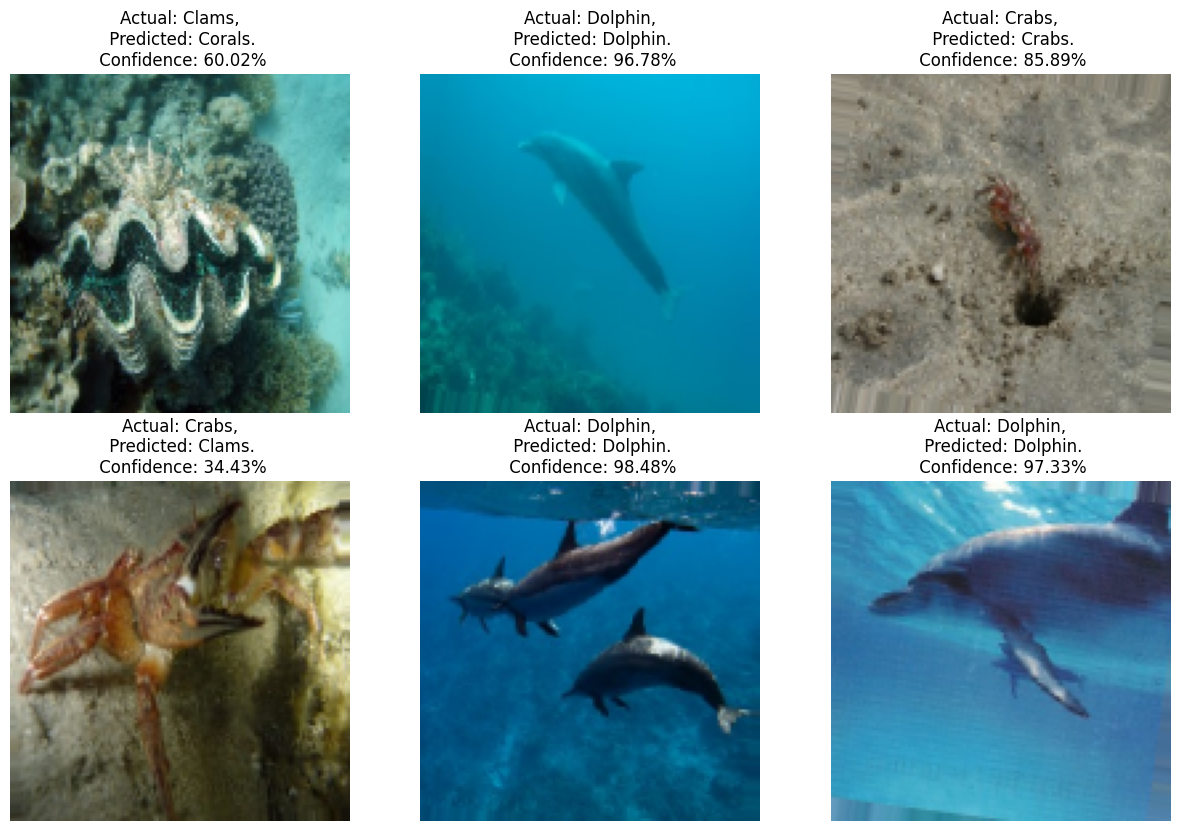

In [37]:
# Visualizing predictions

plt.figure(figsize=(15, 15))
for images, labels in augmentedTestSet:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(cnn, images[i])
        actual_class = classes[int(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break

# Results Interpretation

Interpretation of Performance Metrics:

The accuracy of the model is 78% but while predicting classes other than dolphins such as clams, corals, crabs the model tends to have less confidence and tend to predict wrong class this might be due to imbalanced dataset.

Challenges Encountered:

Choosing the number of epoch: Choosing the number of epochs were a challenge since more number of epochs will lead to more computational time.

Miclassification:
 The missclassification could be avoided by oversampling the individual classes to ana equal amount and adding more epochs and layers

# Conclusion and Recommendations

The CNN was trained to classify images to 4 sea creature categories.

Model Performance: The model achieved a 78% accuracy but there is some misclassification for the some of th eclasses.

Recommendations for Improvement: The improvement can be made by adding more layers and by performing some augmentation on data and oversampling it.
